## Initial Imports

In [3]:
#importing required libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
import backend as bk
from sklearn.neural_network import MLPClassifier
import pandas_profiling
from sklearn import preprocessing

#set plot style to 'ggplot' and don't limit the view of DF when diaplyhign them to screen
plt.style.use('ggplot')
pd.options.display.max_columns = None

## Read the CSV FILE 

In [4]:
#importing our data and resetting our index
df = pd.read_excel('Data/Comp2_Raw_Data.xls')
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


## Renaming Our Columns/Dropping Not Needed Columns

In [5]:
df = df.drop(columns = ['ID'])
df.columns = ['Credit_Limit', 'Gender', 'Education', 'Marriage',  'Age', 'Pay_Sept', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 
             'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_Jul', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_Apr','Pay_Amt_Sept', 'Pay_Amt_Aug',
             'Pay_Amt_Jul', 'Pay_Amt_Jun', 'Pay_Amt_May', 'Pay_Amt_Apr', 'Default']
df.head(5)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Create our Working DF's

In [6]:
#Copy our target variables to their own df
df_target = df[['Default']].copy()
df_target.head(10)

#Drop Default from our target variable df
df = df.drop(['Default'], axis=1)
df.head(5)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
df_target.head(5)

,Default
0,1
1,1
2,0
3,0
4,0


## Use This Code as Model Building
    - based on the website we got the data from, this is the best way to model this data (Neural Network). Not sure what to do but was able to follow the docs on SciKit-Learn to get some sort of result

In [8]:
df.describe()

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


do a classification on if thier spenong for any given month is higher than thier credit limit


In [9]:
df.skew()

Credit_Limit      0.992867
Gender           -0.424183
Education         0.970972
Marriage         -0.018742
Age               0.732246
Pay_Sept          0.731975
Pay_Aug           0.790565
Pay_Jul           0.840682
Pay_Jun           0.999629
Pay_May           1.008197
Pay_Apr           0.948029
Bill_Amt_Sept     2.663861
Bill_Amt_Aug      2.705221
Bill_Amt_Jul      3.087830
Bill_Amt_Jun      2.821965
Bill_Amt_May      2.876380
Bill_Amt_Apr      2.846645
Pay_Amt_Sept     14.668364
Pay_Amt_Aug      30.453817
Pay_Amt_Jul      17.216635
Pay_Amt_Jun      12.904985
Pay_Amt_May      11.127417
Pay_Amt_Apr      10.640727
dtype: float64

In [10]:
df = pd.DataFrame(preprocessing.scale(df, axis=0, with_mean=True, with_std=True, copy=True))
df.columns = ['Credit_Limit', 'Gender', 'Education', 'Marriage',  'Age', 'Pay_Sept', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 
             'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_Jul', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_Apr','Pay_Amt_Sept', 'Pay_Amt_Aug',
             'Pay_Amt_Jul', 'Pay_Amt_Jun', 'Pay_Amt_May', 'Pay_Amt_Apr']

In [18]:
df.head(3)

,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
0,-0.062733,0.044711,0.010255,-0.058350,-0.068765,0.099038,0.098364,-0.038447,-0.036788,-0.084440,-0.082012,-0.035458,-0.035729,-0.036865,-0.037114,-0.036593,-0.036023,-0.018871,-0.012532,-0.016380,-0.017001,-0.017337,-0.016191
1,-0.026544,0.058760,0.013478,0.062270,-0.074636,-0.063462,0.129272,0.010072,0.013690,0.017038,0.144501,-0.047812,-0.048358,-0.046364,-0.045087,-0.043969,-0.043370,-0.024801,-0.015491,-0.017407,-0.017714,-0.022784,-0.013119
2,-0.082081,0.111350,0.025541,0.118002,-0.022150,0.002042,0.015357,0.019086,0.025942,0.032287,0.034792,-0.041035,-0.067882,-0.066303,-0.061812,-0.057339,-0.053826,-0.034401,-0.026373,-0.032987,-0.033567,-0.034179,-0.001666


In [13]:
df.isna().sum()

Credit_Limit     0
Gender           0
Education        0
Marriage         0
Age              0
Pay_Sept         0
Pay_Aug          0
Pay_Jul          0
Pay_Jun          0
Pay_May          0
Pay_Apr          0
Bill_Amt_Sept    0
Bill_Amt_Aug     0
Bill_Amt_Jul     0
Bill_Amt_Jun     0
Bill_Amt_May     0
Bill_Amt_Apr     0
Pay_Amt_Sept     0
Pay_Amt_Aug      0
Pay_Amt_Jul      0
Pay_Amt_Jun      0
Pay_Amt_May      0
Pay_Amt_Apr      0
dtype: int64

In [14]:
df = pd.DataFrame(preprocessing.normalize(df,norm='l1'),columns = df.columns)

In [15]:
df.skew()

Credit_Limit     0.672671
Gender          -0.486467
Education        0.652081
Marriage        -0.091836
Age              0.479981
Pay_Sept         0.640771
Pay_Aug          0.694330
Pay_Jul          0.664144
Pay_Jun          0.570899
Pay_May          0.442014
Pay_Apr          0.512741
Bill_Amt_Sept    1.367582
Bill_Amt_Aug     1.287045
Bill_Amt_Jul     1.265407
Bill_Amt_Jun     1.263412
Bill_Amt_May     1.268568
Bill_Amt_Apr     1.260632
Pay_Amt_Sept     5.596631
Pay_Amt_Aug      6.149863
Pay_Amt_Jul      5.750080
Pay_Amt_Jun      5.795665
Pay_Amt_May      5.916377
Pay_Amt_Apr      6.166319
dtype: float64

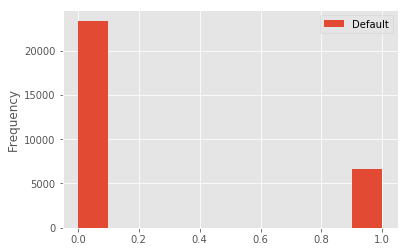

In [16]:
df_target.plot(kind='hist')

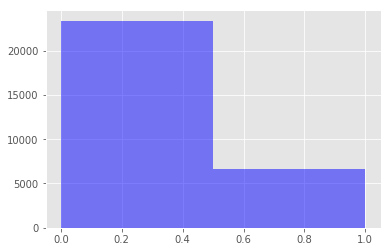

In [17]:
num_bins = 2
plt.hist(df_target['Default'], num_bins, facecolor='blue', alpha=0.5)
plt.show()